# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import os

#Import API Key
from api_keys import api_key

#Define Current Path & Items in Current Working Directory
current_path = os.getcwd()
current_directory = os.listdir()

#Loop Through Items in Current Working Directory
for item in current_directory:
    
    #Find Folder for Global Weather Data
    if item.lower().find('global weather data') >= 0:
        
        #Define Output File Name & Path
        output_file = current_path + '/' + item + '/Global_Weather_Data.csv'

#Define Range of Latitudes & Longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create Set of Random Latitude & Longitude Combinations
lats = np.random.uniform(low = lat_range[0], high = lat_range[1], size = 1500)
lngs = np.random.uniform(low = long_range[0], high = long_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

#Loop Through Latitude & Longitude Combinations
for lat_lng in lat_lngs:
    
    #Collect Name of Nearest City for Each Latitude & Longitude Combination
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Check if City Name Has Already Been Found
    if city not in cities:
        
        #Append New City Names to Final List of Cities
        cities.append(city)

#Print Length of City Name List
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set Open Weather Map API Base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

#Define Python Lists for Individual Weather Parameters
city = []
cloud = []
country = []
date = []
humidity = []
latitude = []
longitude = []
temp = []
wind = []

#Set Counter Variable for API Status Messages
count_1 = 1

#Print API Start Status Message
print('Starting Weather Data Collection from API.')
print('----------------------------------')

#Loop Through List of City Names
for name in cities:
    
    #Set Full API URL for Individual City
    full_url = base_url + name + '&APPID=' + api_key + '&units=imperial'
    
    #Collect Individual City Data from API
    raw_data = requests.get(full_url).json()
    
    #Print API Status Message for Individual City
    print('Processing City ' + str(count_1) + ': ' + name.title())
    
    #Set Condition for City Found In API Database
    if raw_data['cod'] == 200:
        
        #Write Individual City Data to Individual Weather Parameter Lists
        city.append(raw_data.get('name'))
        cloud.append(raw_data['clouds']['all'])
        country.append(raw_data['sys']['country'])
        date.append(raw_data['dt'])
        humidity.append(raw_data['main']['humidity'])
        latitude.append(raw_data['coord']['lat'])
        longitude.append(raw_data['coord']['lon'])
        temp.append(raw_data['main']['temp_max'])
        wind.append(raw_data['wind']['speed'])
    else:
        
        #Print API Status Message For Individual City No Found in API Databse
        print(name.title() + ' Not Found! Skipping!')
    
    #Pause Code to Prevent Exceeding API Call Limit
    time.sleep(1.5)
    
    #Increment Counter Variable for API Status Messages
    count_1 = count_1 + 1

#Print API End Status Message
print('----------------------------------')
print('Weather Data Collection Completed')

Starting Weather Data Collection from API.
----------------------------------
Processing City 1: Illoqqortoormiut
Illoqqortoormiut Not Found! Skipping!
Processing City 2: Ransang
Ransang Not Found! Skipping!
Processing City 3: Cape Town
Processing City 4: Mar Del Plata
Processing City 5: Weihe
Processing City 6: Kazachinskoye
Processing City 7: Atuona
Processing City 8: Mys Shmidta
Mys Shmidta Not Found! Skipping!
Processing City 9: Belushya Guba
Belushya Guba Not Found! Skipping!
Processing City 10: Nikolskoye
Processing City 11: Tuktoyaktuk
Processing City 12: Katsuura
Processing City 13: Carnarvon
Processing City 14: Rafaela
Processing City 15: Port-Cartier
Processing City 16: Pisco
Processing City 17: Healdsburg
Processing City 18: Bluff
Processing City 19: Rikitea
Processing City 20: Merauke
Processing City 21: Punta Arenas
Processing City 22: Georgetown
Processing City 23: Bonavista
Processing City 24: Castro
Processing City 25: Narsaq
Processing City 26: Thompson
Processing City

Processing City 245: Buqayq
Buqayq Not Found! Skipping!
Processing City 246: Klaksvik
Processing City 247: Nara
Processing City 248: Greystones
Processing City 249: Crossville
Processing City 250: Hami
Processing City 251: Gizo
Processing City 252: Verkhnyaya Inta
Processing City 253: Comarapa
Processing City 254: Nicoya
Processing City 255: Koumac
Processing City 256: Talaya
Processing City 257: Padang
Processing City 258: Chapleau
Processing City 259: Haines Junction
Processing City 260: East London
Processing City 261: Antofagasta
Processing City 262: Tabiauea
Tabiauea Not Found! Skipping!
Processing City 263: Santa Isabel Do Rio Negro
Processing City 264: Niquero
Processing City 265: Kalmunai
Processing City 266: Mahebourg
Processing City 267: Faanui
Processing City 268: Liverpool
Processing City 269: Kruisfontein
Processing City 270: Gold Coast
Processing City 271: Marienburg
Processing City 272: Kardamaina
Processing City 273: Porto Novo
Processing City 274: Carballo
Processing C

Processing City 491: Sosnovka
Processing City 492: Dahod
Processing City 493: Os
Os Not Found! Skipping!
Processing City 494: Burns Lake
Processing City 495: Chlorakas
Chlorakas Not Found! Skipping!
Processing City 496: Nuuk
Processing City 497: Fishers
Processing City 498: Berlevag
Processing City 499: Inirida
Processing City 500: Sinnamary
Processing City 501: Xinzhi
Processing City 502: Brae
Processing City 503: Khagrachari
Khagrachari Not Found! Skipping!
Processing City 504: Fevralsk
Fevralsk Not Found! Skipping!
Processing City 505: Rio Grande
Processing City 506: Kasongo-Lunda
Processing City 507: Fortuna
Processing City 508: Sungaipenuh
Processing City 509: Dikson
Processing City 510: Gat
Processing City 511: Veraval
Processing City 512: Torbat-E Jam
Processing City 513: Kapit
Processing City 514: Abu Zabad
Processing City 515: Lorengau
Processing City 516: Kamenka
Processing City 517: Te Anau
Processing City 518: Ushtobe
Processing City 519: Paris
Processing City 520: Yantal
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Create Data Frame of Combined City Weather
city_data = pd.DataFrame({'City': city, 'Cloudiness (%)': cloud, 'Country': country, 'Date': date, 'Humidity (%)': humidity,
                          'Latitude': latitude, 'Longitude': longitude, 'Max Temp (F)': temp, 'Wind Speed (mph)': wind})

#Display Combined City Weather Data Frame
city_data

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,Cape Town,0,ZA,1571347346,88,-33.93,18.42,64.99,5.99
1,Mar del Plata,0,AR,1571347347,21,-46.43,-67.52,67.70,16.71
2,Weihe,94,CN,1571347349,95,32.99,105.33,47.40,2.57
3,Kazachinskoye,98,RU,1571347351,87,57.69,93.28,39.89,7.76
4,Atuona,3,PF,1571347352,76,-9.80,-139.03,79.96,19.80
5,Nikolskoye,90,RU,1571347357,86,59.70,30.79,41.00,4.47
6,Tuktoyaktuk,75,CA,1571347359,79,69.44,-133.03,23.00,13.87
7,Katsuura,75,JP,1571347361,88,33.93,134.50,66.99,5.82
8,Carnarvon,100,ZA,1571347362,56,-30.97,22.13,66.39,13.22
9,Rafaela,88,AR,1571347364,65,-31.25,-61.49,69.01,3.00


In [16]:
#Export Combined City Weather Data Frame to CSV File
city_data.to_csv(output_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

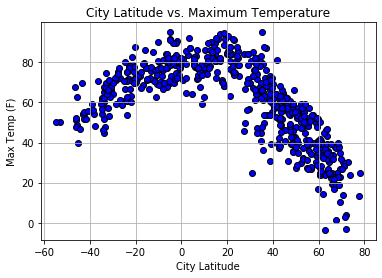

In [17]:
#Plot Latitude Data Versus Maximum Temperature Data
F1, AX1 = plt.subplots()
AX1.scatter(city_data['Latitude'], city_data['Max Temp (F)'], facecolor = 'blue', edgecolor = 'black')
AX1.grid()
AX1.set_title('City Latitude vs. Maximum Temperature')
AX1.set_xlabel('City Latitude')
AX1.set_ylabel('Max Temp (F)')
plt.show()

#### Latitude vs. Humidity Plot

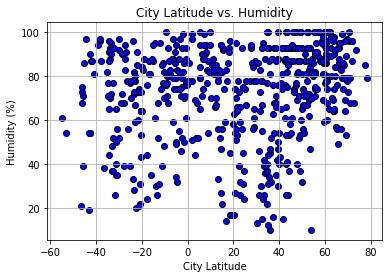

In [18]:
#Plot Latitude Data Versus Humidity Data
F2, AX2 = plt.subplots()
AX2.scatter(city_data['Latitude'], city_data['Humidity (%)'], facecolor = 'blue', edgecolor = 'black')
AX2.grid()
AX2.set_title('City Latitude vs. Humidity')
AX2.set_xlabel('City Latitude')
AX2.set_ylabel('Humidity (%)')
plt.show()

#### Latitude vs. Cloudiness Plot

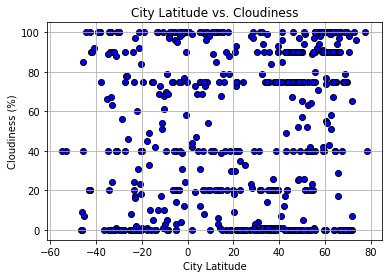

In [19]:
#Plot Latitude Data Versus Cloudiness Data
F3, AX3 = plt.subplots()
AX3.scatter(city_data['Latitude'], city_data['Cloudiness (%)'], facecolor = 'blue', edgecolor = 'black')
AX3.grid()
AX3.set_title('City Latitude vs. Cloudiness')
AX3.set_xlabel('City Latitude')
AX3.set_ylabel('Cloudiness (%)')
plt.show()

#### Latitude vs. Wind Speed Plot

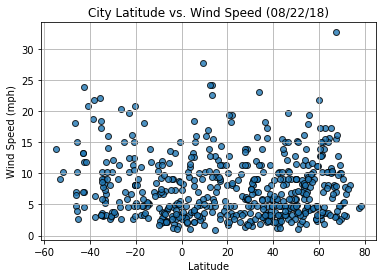